In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
S6L = pd.read_csv('./magazine/final/S6L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
S6L['ADFN_2'] = S6L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
S6L['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN...
2      [셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업...
3      [쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,...
4      [마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,...
                             ...                        
405    [밀란, 패션위크, 참석, 출국, 리사, 공항, 리사, 밀라노, 출국, 리사, 프라...
406    [리사, 패션, 브랜드, 탄생, 엔터테인먼트, 리사, 딴, Manobal, Lali...
407    [서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스...
408    [내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 리사, 아이스크림, 함께한,...
409    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, 컴백, 티징, 비주...
Name: ADFN_2, Length: 410, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./S6L_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,리사,3570
1,예쁘다,676
2,귀엽다,568
3,춤,478
4,LAURENT,405
...,...,...
495,미쳤어,17
496,U,17
497,백안,17
498,편집,17


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙', '외국인', '컬러', '팬', '여자', '쇼', '디자이너', '여성', '드레스', '연습생', '재킷', '인기', '그룹', '예능', 'ANTHONY', '파리', '옷', 'HEDI', '다리', '룩', '팬츠']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙', '외국인', '컬러', '팬', '여자', '쇼', '디자이너', '여성', '드레스', '연습생', '재킷', '인기', '그룹', '예능', 'ANTHONY', '파리', '옷', 'HEDI', '다리', '룩', '팬츠', '프로', '세계', '스타', '하우스', '단발', '분위기', '걸그룹', '태국인', '장식', '외국', '인형', 'CELINE', '아이템', '카리스마', '디자인', '노력', '포인트', '좋다', '소재', '참석', '짱', '쌤', '데님', '시즌', '화보', '한국말', '사랑스럽다', '간지', '선생님', '시크', '세상', '해외', '우리나라', '티셔츠', '완성', '여름', '컴백', '스커트', '프라다', '부츠', '탑', '좋아요', '매치', '톱', '디렉터', '촬영', '음악', '성격', '미쳤다', '연습']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙', '외국인', '컬러', '팬', '여자', '쇼', '디자이너', '여성', '드레스', '연습생', '재킷', '인기', '그룹', '예능', 'ANTHONY', '파리', '옷', 'HEDI', '다리', '룩', '팬츠', '프로', '세계', '스타', '하우스', '단발', '분위기', '걸그룹', '태국인', '장식', '외국', '인형', 'CELINE', '아이템', '카리스마', '디자인', '노력', '포인트', '좋다', '소재', '참석', '짱', '쌤', '데님', '시즌', '화보', '한국말', '사랑스럽다', '간지', '선생님', '시크', '세상', '해외', '우리나라', '티셔츠', '완성', '여름', '컴백', '스커트', '프라다', '부츠', '탑', '좋아요', '매치', '톱', '디렉터', '촬영', '음악', '성격', '미쳤다', '연습', '좋', '콘서트', '아름다운', '레드', '남자', '반', '일본', '메인', '목소리', '좋겠다', '셔츠', '배', '스타일링', '춤선', '나라', '로고', '라인', '점', '언어', '화장', '개멋', '태국어', '댄스', '방송', '캠페인', '마지막', '사기', '미국', '손', '선택', '곡', '가수', '중국어', '가죽', '메이크업', '살', '미친', '슈트', '몸', '찰떡', '댄서', '곳', '힘', '자리', '미니', '솔로', '라이브', 'COUTURE', '백', '의상', '레전드', '프로그램', '웃기', '완벽', '클래식', '화이트', '몸매'

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙', '외국인', '컬러', '팬', '여자', '쇼', '디자이너', '여성', '드레스', '연습생', '재킷', '인기', '그룹', '예능', 'ANTHONY', '파리', '옷', 'HEDI', '다리', '룩', '팬츠', '프로', '세계', '스타', '하우스', '단발', '분위기', '걸그룹', '태국인', '장식', '외국', '인형', 'CELINE', '아이템', '카리스마', '디자인', '노력', '포인트', '좋다', '소재', '참석', '짱', '쌤', '데님', '시즌', '화보', '한국말', '사랑스럽다', '간지', '선생님', '시크', '세상', '해외', '우리나라', '티셔츠', '완성', '여름', '컴백', '스커트', '프라다', '부츠', '탑', '좋아요', '매치', '톱', '디렉터', '촬영', '음악', '성격', '미쳤다', '연습', '좋', '콘서트', '아름다운', '레드', '남자', '반', '일본', '메인', '목소리', '좋겠다', '셔츠', '배', '스타일링', '춤선', '나라', '로고', '라인', '점', '언어', '화장', '개멋', '태국어', '댄스', '방송', '캠페인', '마지막', '사기', '미국', '손', '선택', '곡', '가수', '중국어', '가죽', '메이크업', '살', '미친', '슈트', '몸', '찰떡', '댄서', '곳', '힘', '자리', '미니', '솔로', '라이브', 'COUTURE', '백', '의상', '레전드', '프로그램', '웃기', '완벽', '클래식', '화이트', '몸매'

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', '예쁘다', '귀엽다', '춤', 'LAURENT', '사랑', '랩', '한국', '패션', '영어', '노래', '무대', '얼굴', '멋있다', '최고', '매력', '아이돌', '태국', '컬렉션', '브랜드', '중국', '한국어', '한국인', '스타일', '비율', '표정', '느낌', '모델', '실력', '블랙', '외국인', '컬러', '팬', '여자', '쇼', '디자이너', '여성', '드레스', '연습생', '재킷', '인기', '그룹', '예능', 'ANTHONY', '파리', '옷', 'HEDI', '다리', '룩', '팬츠', '프로', '세계', '스타', '하우스', '단발', '분위기', '걸그룹', '태국인', '장식', '외국', '인형', 'CELINE', '아이템', '카리스마', '디자인', '노력', '포인트', '좋다', '소재', '참석', '짱', '쌤', '데님', '시즌', '화보', '한국말', '사랑스럽다', '간지', '선생님', '시크', '세상', '해외', '우리나라', '티셔츠', '완성', '여름', '컴백', '스커트', '프라다', '부츠', '탑']


### top50만 남기기

In [14]:
len(S6L)

410

In [15]:
top30_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(S6L)):
    w=[]
    for word in S6L.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
S6L

,magazine,brand,title,word,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영","['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","[빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU..."
1,A,YSL,백 하나 살까 고민했다면? 영원한 아이코닉 백 6가지,[' 블랙 보디에 YSL 골드 잠금장치를 더한 스몰 사이즈 솔페리노 사첼백은 4백...,"['블랙', '보디', 'YSL', '골드', '잠금장치', '스몰', '사이즈',...","[블랙, 보디, YSL, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LAUREN..."
2,A,YSL,골든의 황금시간,[' 셔츠는 생로랑 바이 안토니 바카렐로(Saint Laurent by Antho...,"['셔츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHO...","[셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업..."
3,A,YSL,다이어트의 마음,['나는 쉬지 않고 다이어트를 한다. 평생을 장거리 수영선수 같은 몸을 가지고 싶었...,"['쉬', '다이어트', '평생', '장거리', '수영', '선수', '몸', '가...","[쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,..."
4,A,YSL,네? 명품 브랜드의 마스크라고요? 코로나19가 바꾼 전 세계 패션 신,"['마스크 품귀현상, 마스크 구입 5부제 등 우리나라를 떠들썩하게 만들었던 마스크 ...","['마스크', '품귀', '현상', '마스크', '구입', '우리나라', '마스크'...","[마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,..."
...,...,...,...,...,...,...
405,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 출국, 리사, 공항, 리사, 밀라노, 출국, 리사, 프라..."
406,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 엔터테인먼트, 리사, 딴, Manobal, Lali..."
407,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스..."
408,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 리사, 아이스크림, 함께한,..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['블랙', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY', 'LAURENT', '브랜드', '컬러'],
 ['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY', '스타일'],
 ['최고', '사랑', 'HEDI', '스타일', 'ANTHONY', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['브랜드', 'LAURENT', '그룹', '중국'],
 ['쇼', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['드레스',
  '컬러',
  'LAURENT',
  'ANTHONY',
  'LAURENT',
  'ANTHONY',
  '드레스',
  '컬러',
  'LAURENT',
  'ANTHONY'],
 ['브랜드',
  '브랜드',
  '옷',
  '브랜드',
  '옷',
  '옷',
  '컬렉션',
  '드레스',
  '브랜드',
  'LAURENT',
  'HEDI',
  '브랜드',
  '디자이너',
  '디자이너',
  '브랜드',
  'LAURENT',
  '브랜드',
  '브랜드'],
 ['패션', 'LAURENT', '재킷', '패션', '재킷', '컬러', '사랑'],
 ['브랜드', '컬러', '블랙', '컬렉션', '블랙', 'LAURENT', '컬러', '브랜드'],
 ['LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['드레스', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY'],
 ['재킷', '팬츠', 'HEDI', 'HEDI', 'LAURENT', '사랑', 'LAURENT', '무대'],
 ['LAURENT', '블랙', '컬러', '인기', '스타일', 'LAURENT', '파리', '인기', '패션'],
 ['LAURENT', 'HEDI'],
 ['LAURENT', '스타일

In [28]:
len(top50_word)

410

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['LAURENT', 'LAURENT']

In [31]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
119,"(패션, 리사)",0.195122,"[((), (패션, 리사), 0.1951219512195122, 1.0), ((리사...",2
95,"(매력, 리사)",0.143902,"[((), (매력, 리사), 0.14390243902439023, 1.0), ((리...",2
129,"(패션, 브랜드)",0.141463,"[((), (브랜드, 패션), 0.14146341463414633, 1.0), ((...",2
85,"(패션, LAURENT)",0.134146,"[((), (패션, LAURENT), 0.13414634146341464, 1.0)...",2
83,"(컬렉션, LAURENT)",0.129268,"[((), (컬렉션, LAURENT), 0.12926829268292683, 1.0...",2
80,"(브랜드, LAURENT)",0.121951,"[((), (브랜드, LAURENT), 0.12195121951219512, 1.0...",2
101,"(블랙, 리사)",0.121951,"[((), (블랙, 리사), 0.12195121951219512, 1.0), ((리...",2
117,"(리사, 컬러)",0.117073,"[((), (리사, 컬러), 0.11707317073170732, 1.0), ((리...",2
121,"(포인트, 리사)",0.112195,"[((), (포인트, 리사), 0.11219512195121951, 1.0), ((...",2
93,"(리사, 룩)",0.112195,"[((), (룩, 리사), 0.11219512195121951, 1.0), ((룩)...",2


In [32]:
for item in df['items']:
    if '리사' in item:
        print(item)

frozenset({'패션', '리사'})
frozenset({'매력', '리사'})
frozenset({'블랙', '리사'})
frozenset({'리사', '컬러'})
frozenset({'포인트', '리사'})
frozenset({'리사', '룩'})
frozenset({'리사', '사랑'})
frozenset({'스타일', '리사'})
frozenset({'무대', '리사'})
frozenset({'팬', '리사'})
frozenset({'얼굴', '리사'})
frozenset({'브랜드', '리사'})
frozenset({'한국', '리사'})
frozenset({'걸그룹', '리사'})
frozenset({'매치', '리사'})
frozenset({'그룹', '리사'})
frozenset({'리사', '완성'})
frozenset({'태국', '리사'})
frozenset({'예쁘다', '리사'})
frozenset({'세계', '리사'})
frozenset({'아이돌', '리사'})
frozenset({'인형', '리사'})
frozenset({'춤', '리사'})
frozenset({'재킷', '리사'})
frozenset({'시크', '리사'})
frozenset({'분위기', '리사'})
frozenset({'모델', '리사'})
frozenset({'느낌', '리사'})
frozenset({'귀엽다', '리사'})
frozenset({'스타', '리사'})
frozenset({'최고', '리사'})
frozenset({'아름다운', '리사'})
frozenset({'사랑스럽다', '리사'})
frozenset({'노래', '리사'})


In [33]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [34]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [35]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [36]:
pos = nx.spring_layout(G)

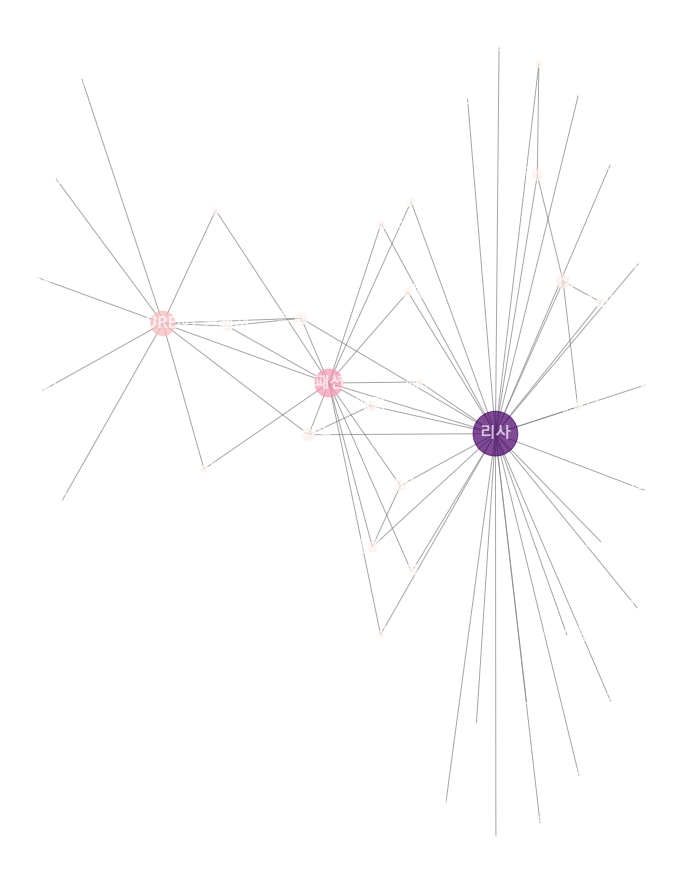

In [37]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_S6L_top500_mis07.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [54]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']